In [ ]:
!pip install statsbombpy

     |████████████████████████████████| 47 kB 1.8 MB/s 
     |████████████████████████████████| 144 kB 8.2 MB/s 
     |████████████████████████████████| 207 kB 50.2 MB/s 
     |████████████████████████████████| 127 kB 51.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: coverage
    Found existing installation: coverage 3.7.1
    Uninstalling coverage-3.7.1:
      Successfully uninstalled coverage-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires coverage==3.7.1, but you have coverage 6.3.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
coveralls 0.5 requires coverage<3.999,>=3.6, but you have coverage 6.3.2 which is incompa

In [ ]:
!pip install mplsoccer

     |████████████████████████████████| 57 kB 2.3 MB/s 
  Created wheel for mplsoccer: filename=mplsoccer-1.0.5-py3-none-any.whl size=62946 sha256=0906510e659b945c25d7ce1d4491b1519dad1d95c05e9792c864ef9d82e5495a
  Stored in directory: /root/.cache/pip/wheels/35/71/46/5f3df8e696517b395ed75971c4d09f5854310efc09d364a9ca
Successfully built mplsoccer


In [ ]:
from statsbombpy import sb

In [ ]:
sb.matches(competition_id=16,season_id=2)

/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,18244,2017-06-03,20:45:00.000,Europe - Champions League,2016/2017,Juventus,Real Madrid,1,4,available,...,2021-06-13T16:17:31.694,7,Final,Principality Stadium,Felix Brych,Massimiliano Allegri,Zinédine Zidane,1.0.3,None,None


In [ ]:
events = sb.events(match_id = 18244)

/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


In [ ]:
events = events[['team','type','minute','location','pass_end_location','player','pass_recipient']]

In [ ]:
events_1=events[events['team']=='Real Madrid']
events_1

,team,type,minute,location,pass_end_location,player,pass_recipient
1,Real Madrid,Starting XI,0,NaN,NaN,NaN,NaN
2,Real Madrid,Half Start,0,NaN,NaN,NaN,NaN
4,Real Madrid,Half Start,45,NaN,NaN,NaN,NaN
10,Real Madrid,Pass,0,"[29.0, 73.0]","[32.0, 74.0]",Daniel Carvajal Ramos,Luka Modrić
11,Real Madrid,Pass,0,"[36.0, 75.0]","[57.0, 75.0]",Luka Modrić,NaN
...,...,...,...,...,...,...,...
3389,Real Madrid,Half End,94,NaN,NaN,NaN,NaN
3394,Real Madrid,Substitution,77,NaN,NaN,Karim Benzema,NaN
3396,Real Madrid,Substitution,81,NaN,NaN,Francisco Román Alarcón Suárez,NaN
3397,Real Madrid,Substitution,88,NaN,NaN,Toni Kroos,NaN


In [ ]:
events_1[events_1['type']=='Substitution']

,team,type,minute,location,pass_end_location,player,pass_recipient
3394,Real Madrid,Substitution,77,NaN,NaN,Karim Benzema,NaN
3396,Real Madrid,Substitution,81,NaN,NaN,Francisco Román Alarcón Suárez,NaN
3397,Real Madrid,Substitution,88,NaN,NaN,Toni Kroos,NaN


In [ ]:
pass_events=events_1[events_1['type']=='Pass'].reset_index()
pass_events

,index,team,type,minute,location,pass_end_location,player,pass_recipient
0,10,Real Madrid,Pass,0,"[29.0, 73.0]","[32.0, 74.0]",Daniel Carvajal Ramos,Luka Modrić
1,11,Real Madrid,Pass,0,"[36.0, 75.0]","[57.0, 75.0]",Luka Modrić,NaN
2,24,Real Madrid,Pass,0,"[15.0, 54.0]","[21.0, 62.0]",Toni Kroos,Luka Modrić
3,25,Real Madrid,Pass,1,"[27.0, 56.0]","[41.0, 63.0]",Raphaël Varane,Luka Modrić
4,26,Real Madrid,Pass,1,"[43.0, 64.0]","[92.0, 40.0]",Luka Modrić,NaN
...,...,...,...,...,...,...,...,...
554,1000,Real Madrid,Pass,92,"[78.0, 78.0]","[66.0, 76.0]",Marco Asensio Willemsen,Daniel Carvajal Ramos
555,1001,Real Madrid,Pass,92,"[68.0, 76.0]","[65.0, 5.0]",Daniel Carvajal Ramos,Gareth Frank Bale
556,1002,Real Madrid,Pass,93,"[69.0, 15.0]","[57.0, 26.0]",Gareth Frank Bale,Sergio Ramos García
557,1003,Real Madrid,Pass,93,"[55.0, 27.0]","[64.0, 36.0]",Sergio Ramos García,Carlos Henrique Casimiro


In [ ]:
pass_events=pass_events[pass_events['minute']<77]
pass_events

,index,team,type,minute,location,pass_end_location,player,pass_recipient
0,10,Real Madrid,Pass,0,"[29.0, 73.0]","[32.0, 74.0]",Daniel Carvajal Ramos,Luka Modrić
1,11,Real Madrid,Pass,0,"[36.0, 75.0]","[57.0, 75.0]",Luka Modrić,NaN
2,24,Real Madrid,Pass,0,"[15.0, 54.0]","[21.0, 62.0]",Toni Kroos,Luka Modrić
3,25,Real Madrid,Pass,1,"[27.0, 56.0]","[41.0, 63.0]",Raphaël Varane,Luka Modrić
4,26,Real Madrid,Pass,1,"[43.0, 64.0]","[92.0, 40.0]",Luka Modrić,NaN
...,...,...,...,...,...,...,...,...
477,858,Real Madrid,Pass,75,"[30.0, 27.0]","[43.0, 9.0]",Sergio Ramos García,Marcelo Vieira da Silva Júnior
478,859,Real Madrid,Pass,75,"[43.0, 10.0]","[58.0, 11.0]",Marcelo Vieira da Silva Júnior,Francisco Román Alarcón Suárez
479,860,Real Madrid,Pass,75,"[57.0, 14.0]","[51.0, 21.0]",Francisco Román Alarcón Suárez,Toni Kroos
480,861,Real Madrid,Pass,75,"[51.0, 21.0]","[44.0, 8.0]",Toni Kroos,Marcelo Vieira da Silva Júnior


In [ ]:
passes_between=pass_events.groupby(['player','pass_recipient'],as_index=False).agg({'type':'count'})
passes_between

,player,pass_recipient,type
0,Carlos Henrique Casimiro,Daniel Carvajal Ramos,8
1,Carlos Henrique Casimiro,Francisco Román Alarcón Suárez,10
2,Carlos Henrique Casimiro,Karim Benzema,1
3,Carlos Henrique Casimiro,Luka Modrić,6
4,Carlos Henrique Casimiro,Marcelo Vieira da Silva Júnior,2
...,...,...,...
87,Toni Kroos,Karim Benzema,8
88,Toni Kroos,Luka Modrić,9
89,Toni Kroos,Marcelo Vieira da Silva Júnior,10
90,Toni Kroos,Raphaël Varane,2


In [ ]:
#for all events for france
game=events_1[(events_1['player'].isin(passes_between['player'])) & (events_1['pass_recipient'].isin(passes_between['pass_recipient']))]
game['pass_recipient'].nunique()

11

In [ ]:
game=game.groupby(['player','pass_recipient'],as_index=False).agg({'type':'count'})
game

,player,pass_recipient,type
0,Carlos Henrique Casimiro,Daniel Carvajal Ramos,8
1,Carlos Henrique Casimiro,Francisco Román Alarcón Suárez,10
2,Carlos Henrique Casimiro,Karim Benzema,1
3,Carlos Henrique Casimiro,Keylor Navas Gamboa,2
4,Carlos Henrique Casimiro,Luka Modrić,7
...,...,...,...
90,Toni Kroos,Keylor Navas Gamboa,1
91,Toni Kroos,Luka Modrić,10
92,Toni Kroos,Marcelo Vieira da Silva Júnior,11
93,Toni Kroos,Raphaël Varane,2


In [ ]:
game.describe()

,type
count,95.000000
mean,5.231579
std,4.074969
min,1.000000
25%,2.000000
50%,4.000000
75%,8.000000
max,21.000000


In [ ]:
game.rename(columns={'type':'pass_count'},inplace=True)

In [ ]:
desc=game.describe()
threshold=desc.iloc[4]
thresh=threshold.item()
game=game[game['pass_count']>=thresh].reset_index(drop=True)
game.describe()

,pass_count
count,79.000000
mean,6.088608
std,3.949001
min,2.000000
25%,3.000000
50%,5.000000
75%,8.000000
max,21.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,10))
scaler.fit(game['pass_count'].values.reshape(-1,1))
game['pass_count']=scaler.transform(game['pass_count'].values.reshape(-1,1))
game

,player,pass_recipient,pass_count
0,Carlos Henrique Casimiro,Daniel Carvajal Ramos,3.157895
1,Carlos Henrique Casimiro,Francisco Román Alarcón Suárez,4.210526
2,Carlos Henrique Casimiro,Keylor Navas Gamboa,0.000000
3,Carlos Henrique Casimiro,Luka Modrić,2.631579
4,Carlos Henrique Casimiro,Marcelo Vieira da Silva Júnior,0.526316
...,...,...,...
74,Toni Kroos,Karim Benzema,3.157895
75,Toni Kroos,Luka Modrić,4.210526
76,Toni Kroos,Marcelo Vieira da Silva Júnior,4.736842
77,Toni Kroos,Raphaël Varane,0.000000


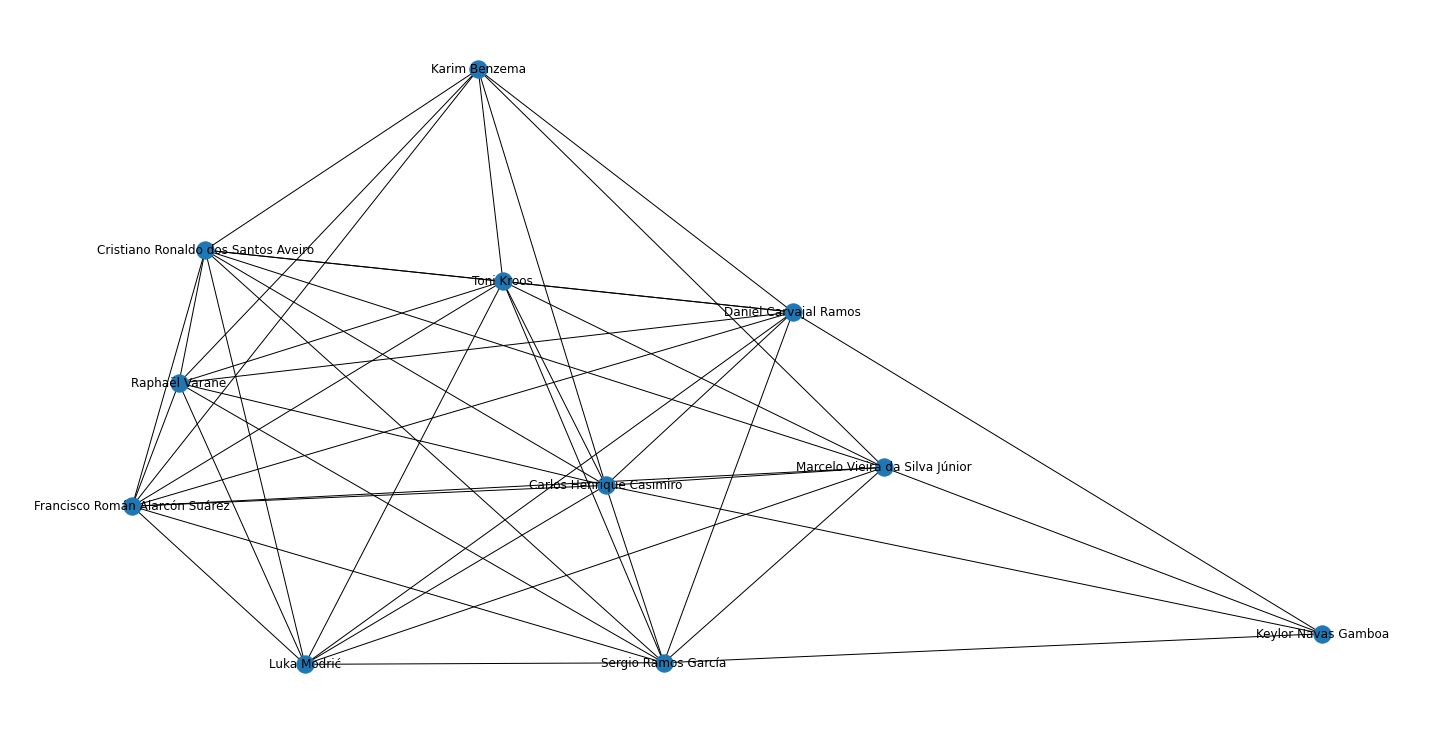

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
 
# Build a dataframe with 4 connections
# Build your graph
G=nx.from_pandas_edgelist(game, 'player', 'pass_recipient',edge_attr='pass_count')
 
# Plot it
plt.figure(figsize=(20,10))
nx.draw(G, with_labels=True)
plt.show()

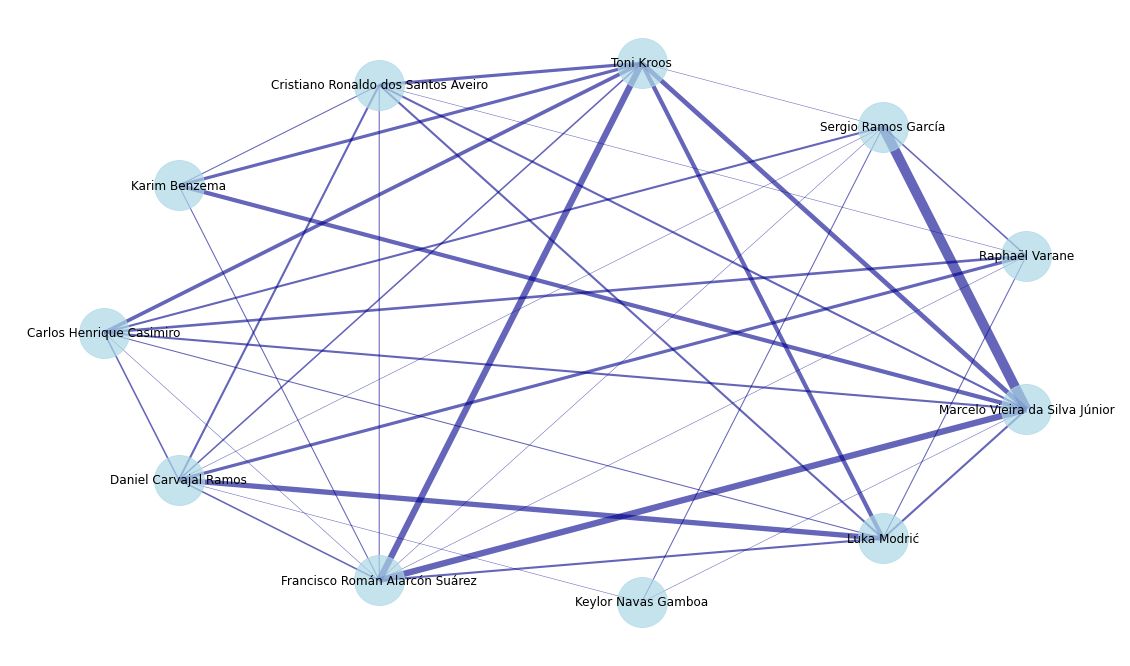

In [ ]:
widths = nx.get_edge_attributes(G, 'pass_count')
nodelist = G.nodes()

plt.figure(figsize=(20,12))

pos = nx.shell_layout(G)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=2500,
                       node_color='lightblue',
                       alpha=0.7)
nx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                       width=list(widths.values()),
                       edge_color='darkblue',
                       alpha=0.6)
nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='black')
plt.box(False)
plt.show()

In [ ]:
game.player.nunique()

11

In [ ]:
events_1=events_1[events_1['type']=='Pass']

In [ ]:
import pandas as pd
df3 = pd.DataFrame(events_1)
df3

,team,type,minute,location,pass_end_location,player,pass_recipient
10,Real Madrid,Pass,0,"[29.0, 73.0]","[32.0, 74.0]",Daniel Carvajal Ramos,Luka Modrić
11,Real Madrid,Pass,0,"[36.0, 75.0]","[57.0, 75.0]",Luka Modrić,NaN
24,Real Madrid,Pass,0,"[15.0, 54.0]","[21.0, 62.0]",Toni Kroos,Luka Modrić
25,Real Madrid,Pass,1,"[27.0, 56.0]","[41.0, 63.0]",Raphaël Varane,Luka Modrić
26,Real Madrid,Pass,1,"[43.0, 64.0]","[92.0, 40.0]",Luka Modrić,NaN
...,...,...,...,...,...,...,...
1000,Real Madrid,Pass,92,"[78.0, 78.0]","[66.0, 76.0]",Marco Asensio Willemsen,Daniel Carvajal Ramos
1001,Real Madrid,Pass,92,"[68.0, 76.0]","[65.0, 5.0]",Daniel Carvajal Ramos,Gareth Frank Bale
1002,Real Madrid,Pass,93,"[69.0, 15.0]","[57.0, 26.0]",Gareth Frank Bale,Sergio Ramos García
1003,Real Madrid,Pass,93,"[55.0, 27.0]","[64.0, 36.0]",Sergio Ramos García,Carlos Henrique Casimiro


In [ ]:
df3=df3[df3['player'].notna()]
df3=df3[df3['location'].notna()]
df3

,team,type,minute,location,pass_end_location,player,pass_recipient
10,Real Madrid,Pass,0,"[29.0, 73.0]","[32.0, 74.0]",Daniel Carvajal Ramos,Luka Modrić
11,Real Madrid,Pass,0,"[36.0, 75.0]","[57.0, 75.0]",Luka Modrić,NaN
24,Real Madrid,Pass,0,"[15.0, 54.0]","[21.0, 62.0]",Toni Kroos,Luka Modrić
25,Real Madrid,Pass,1,"[27.0, 56.0]","[41.0, 63.0]",Raphaël Varane,Luka Modrić
26,Real Madrid,Pass,1,"[43.0, 64.0]","[92.0, 40.0]",Luka Modrić,NaN
...,...,...,...,...,...,...,...
1000,Real Madrid,Pass,92,"[78.0, 78.0]","[66.0, 76.0]",Marco Asensio Willemsen,Daniel Carvajal Ramos
1001,Real Madrid,Pass,92,"[68.0, 76.0]","[65.0, 5.0]",Daniel Carvajal Ramos,Gareth Frank Bale
1002,Real Madrid,Pass,93,"[69.0, 15.0]","[57.0, 26.0]",Gareth Frank Bale,Sergio Ramos García
1003,Real Madrid,Pass,93,"[55.0, 27.0]","[64.0, 36.0]",Sergio Ramos García,Carlos Henrique Casimiro


In [ ]:
df3[['locationx','locationy']] = pd.DataFrame(df3.location.tolist(), index= df3.index)
df3

,team,type,minute,location,pass_end_location,player,pass_recipient,locationx,locationy
10,Real Madrid,Pass,0,"[29.0, 73.0]","[32.0, 74.0]",Daniel Carvajal Ramos,Luka Modrić,29.0,73.0
11,Real Madrid,Pass,0,"[36.0, 75.0]","[57.0, 75.0]",Luka Modrić,NaN,36.0,75.0
24,Real Madrid,Pass,0,"[15.0, 54.0]","[21.0, 62.0]",Toni Kroos,Luka Modrić,15.0,54.0
25,Real Madrid,Pass,1,"[27.0, 56.0]","[41.0, 63.0]",Raphaël Varane,Luka Modrić,27.0,56.0
26,Real Madrid,Pass,1,"[43.0, 64.0]","[92.0, 40.0]",Luka Modrić,NaN,43.0,64.0
...,...,...,...,...,...,...,...,...,...
1000,Real Madrid,Pass,92,"[78.0, 78.0]","[66.0, 76.0]",Marco Asensio Willemsen,Daniel Carvajal Ramos,78.0,78.0
1001,Real Madrid,Pass,92,"[68.0, 76.0]","[65.0, 5.0]",Daniel Carvajal Ramos,Gareth Frank Bale,68.0,76.0
1002,Real Madrid,Pass,93,"[69.0, 15.0]","[57.0, 26.0]",Gareth Frank Bale,Sergio Ramos García,69.0,15.0
1003,Real Madrid,Pass,93,"[55.0, 27.0]","[64.0, 36.0]",Sergio Ramos García,Carlos Henrique Casimiro,55.0,27.0


In [ ]:
df3=df3.groupby(by=['player'],as_index=False).agg({'locationx':'mean','locationy':'mean'})
df3

,player,locationx,locationy
0,Carlos Henrique Casimiro,50.481481,41.796296
1,Cristiano Ronaldo dos Santos Aveiro,77.090909,40.590909
2,Daniel Carvajal Ramos,61.476923,71.200000
3,Francisco Román Alarcón Suárez,70.653846,30.692308
4,Gareth Frank Bale,68.166667,9.000000
5,Karim Benzema,79.086957,21.913043
6,Keylor Navas Gamboa,13.526316,40.421053
7,Luka Modrić,63.551724,52.396552
8,Marcelo Vieira da Silva Júnior,62.352113,9.380282
9,Marco Asensio Willemsen,57.000000,68.000000


In [ ]:
df3=df3[df3['player'].isin(game['player'].unique())].reset_index(drop=True)

In [ ]:
df3

,player,locationx,locationy
0,Carlos Henrique Casimiro,50.481481,41.796296
1,Cristiano Ronaldo dos Santos Aveiro,77.090909,40.590909
2,Daniel Carvajal Ramos,61.476923,71.200000
3,Francisco Román Alarcón Suárez,70.653846,30.692308
4,Karim Benzema,79.086957,21.913043
5,Keylor Navas Gamboa,13.526316,40.421053
6,Luka Modrić,63.551724,52.396552
7,Marcelo Vieira da Silva Júnior,62.352113,9.380282
8,Raphaël Varane,44.520833,56.791667
9,Sergio Ramos García,41.209677,25.903226


In [ ]:
df3.loc[(df3['locationy']<50.0),'location_y']=(100-df3['locationy'])
df3.loc[(df3['locationy']>50.0),'location_y']=(100-df3['locationy'])
df3

,player,locationx,locationy,location_y
0,Carlos Henrique Casimiro,50.481481,41.796296,58.203704
1,Cristiano Ronaldo dos Santos Aveiro,77.090909,40.590909,59.409091
2,Daniel Carvajal Ramos,61.476923,71.200000,28.800000
3,Francisco Román Alarcón Suárez,70.653846,30.692308,69.307692
4,Karim Benzema,79.086957,21.913043,78.086957
5,Keylor Navas Gamboa,13.526316,40.421053,59.578947
6,Luka Modrić,63.551724,52.396552,47.603448
7,Marcelo Vieira da Silva Júnior,62.352113,9.380282,90.619718
8,Raphaël Varane,44.520833,56.791667,43.208333
9,Sergio Ramos García,41.209677,25.903226,74.096774


In [ ]:
df3.set_index('player',inplace=True)

In [ ]:

!pip install highlight_text

In [ ]:
import matplotlib as mpl
from mplsoccer.pitch import Pitch
from matplotlib.colors import to_rgba
import numpy as np
from mplsoccer.statsbomb import read_event, EVENT_SLUG
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colorbar
from matplotlib.colors import LinearSegmentedColormap
from highlight_text import fig_text
import math

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


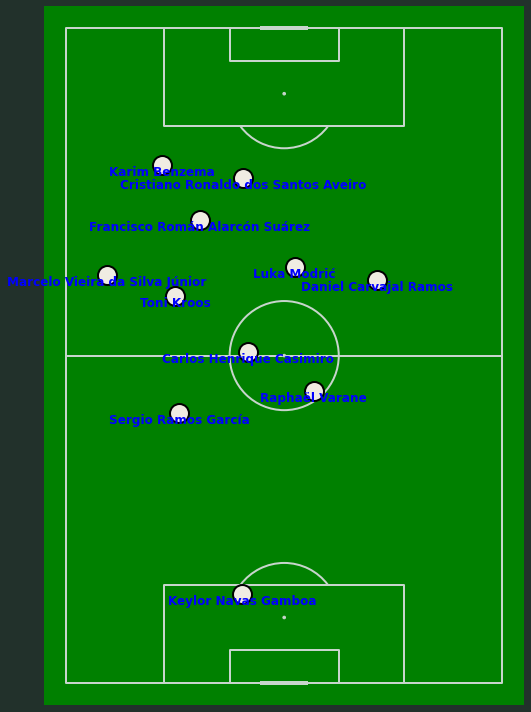

In [ ]:
#plotting the average location for the players
#Make arrows less transparent if they have a higher count, totally optional of course
from mplsoccer import Pitch, VerticalPitch
import numpy as np
min_transparency = 0.3
color = np.array(to_rgba('#d3d3d3'))
color = np.tile(color, (len(df3), 1))


#plot pitch
pitch = VerticalPitch(pitch_type='statsbomb', orientation='vertical',
              pitch_color='green', line_color='#c7d5cc', figsize=(20, 1),
              constrained_layout=True, tight_layout=False,half=False)
fig, ax = pitch.draw(figsize=(20,10))



''' 
pass_arrows = pitch.arrows(1.2*passes_between.x, 80-0.8*passes_between.y,
                         1.2*passes_between.x_end, 80-0.8*passes_between.y_end, width=5,
                         headwidth=5, headlength=5, color=color, ax=ax, zorder=1)

size=1000
radius = math.sqrt(size)/2.
arrow = mpl.patches.FancyArrowPatch(posA=(1.2*passes_between.x,80-.8*passes_between.y), 
                                    posB=(1.2*passes_between.x_end,80-.8*passes_between.y_end), 
                                    arrowstyle='-|>', mutation_scale=20, shrinkA=radius, shrinkB=radius)

ax.add_patch(arrow)
 '''
#plot nodes
pass_nodes = pitch.scatter(1.2*df3.locationx, 80-0.8*df3.location_y,s=360,
                           color='#f0ece2', edgecolors="#010101", linewidth=2, alpha=1, ax=ax, zorder=2)


#anootation/key at bottom
# pitch.annotate("Node Positions = Average Start Location of Completed Passes\nArrows Show Pass Combinations Which Occured Over 5 Times", (-4, 40), color='w',
#                fontsize=10, ha='center', va='center', ax=ax, fontweight='bold', fontfamily="Andale Mono")


#Uncomment these next two lines to get each node labeled with the player id. Check to see if anything looks off, and make note of each player if you're going to add labeles later like their numbers
for index, row in df3.iterrows():
     pitch.annotate(row.name, xy=(1.2*row.locationx, 80-0.8*row.location_y), c='blue', va='top', ha='center', size=12, fontweight='bold', fontfamily="Calibri",ax=ax)

#Set the background color
fig.patch.set_facecolor('#22312b')


In [ ]:
nx.write_gml(G, "JuventusvsRealmadrid(RM).gml")